In [1]:
import pandas as pd
from skpsl.estimators import MulticlassScoringList
from sklearn.metrics import ConfusionMatrixDisplay, balanced_accuracy_score
import matplotlib.pyplot as plt
import logging
import numpy as np
import seaborn as sns
logging.basicConfig(level=logging.INFO)

sns.set(font_scale=1,rc={'text.usetex' : True})
sns.set_style("white")
plt.rc('font', **{'family': 'serif'})
plt.rcParams["figure.figsize"] = (7.45, 3.5)

In [2]:
df_train = pd.read_csv("scratch/pretest data/data_for_otree_pretest_train.csv", index_col=0)#.sample(200)
X_train= df_train.iloc[:,2:]
y_train = df_train.iloc[:,1]
df_test = pd.read_csv("scratch/pretest data/data_for_otree_pretest_test.csv", index_col=0)
X_test= df_test.iloc[:,2:]
y_test = df_test.iloc[:,1]

In [3]:
clf = MulticlassScoringList(score_set=range(-3,4), l2=1e-6).fit(X_train,y_train)

100%|██████████| 2401/2401 [00:04<00:00, 510.26it/s]
INFO:skpsl.estimators.multiclass_scoring_list:bias terms: [1, 0, 0, 1]
100%|██████████| 28812/28812 [00:56<00:00, 512.79it/s]
INFO:skpsl.estimators.multiclass_scoring_list:scores for stage 1: [1, 3, -3, 3]
100%|██████████| 26411/26411 [00:52<00:00, 502.50it/s]
INFO:skpsl.estimators.multiclass_scoring_list:scores for stage 2: [2, -3, 3, -1]
100%|██████████| 24010/24010 [00:49<00:00, 485.90it/s]
INFO:skpsl.estimators.multiclass_scoring_list:scores for stage 3: [1, -1, -1, 1]
100%|██████████| 21609/21609 [00:39<00:00, 546.57it/s]
INFO:skpsl.estimators.multiclass_scoring_list:scores for stage 4: [2, 3, -3, 1]
100%|██████████| 19208/19208 [00:35<00:00, 538.21it/s]
INFO:skpsl.estimators.multiclass_scoring_list:scores for stage 5: [-1, -1, 2, -1]
100%|██████████| 16807/16807 [00:30<00:00, 557.79it/s]
INFO:skpsl.estimators.multiclass_scoring_list:scores for stage 6: [1, 3, -3, 3]
100%|██████████| 14406/14406 [00:26<00:00, 538.71it/s]
INFO:sk

In [4]:
print(clf.score(X_test,y_test), len(clf))
for stage in clf:
    print("acc:", f"{stage.score(X_test,y_test):.4f}","info:", f"{balanced_accuracy_score(y_test,clf.predict(X_test), adjusted=True):.4f}", stage.stage, len(stage.features))

9.681972789115646 12
acc: 0.3690 info: 0.0015 0 0
acc: 0.5289 info: 0.0906 1 1
acc: 0.6361 info: 0.3375 2 2
acc: 0.6667 info: 0.3393 3 3
acc: 0.7585 info: 0.5546 4 4
acc: 0.8282 info: 0.7549 5 5
acc: 0.8367 info: 0.7574 6 6
acc: 0.8350 info: 0.6866 7 7
acc: 0.8384 info: 0.7893 8 8
acc: 0.8401 info: 0.7990 9 9
acc: 0.8520 info: 0.8081 10 10
acc: 0.8418 info: 0.7542 11 11
acc: 0.8435 info: 0.7596 12 12


In [5]:
#print(clf.inspect(X_train.columns)[["Feature","Thresholds (>)","Forward","Midfielder","Defender","Goalkeeper"]].to_latex())
clf.inspect(X_train.columns)[["Feature","Thresholds (>)","Forward","Midfielder","Defender","Goalkeeper"]]

,Feature,Thresholds (>),Forward,Midfielder,Defender,Goalkeeper
0,,NaN,0,1,1,0
1,Average Shots per Match,0.550,3,3,1,-3
2,Average Minutes per Match,78.795,-3,-1,2,3
3,Average Pass Success Rate (%),74.550,-1,1,1,-1
4,Average Aerial Duels Won per Match,0.650,3,1,2,-3
5,Player Height (cm),183.500,-1,-1,-1,2
6,Average Assists per Match,0.035,3,3,1,-3
7,Average Yellow Cards per Match,0.095,0,1,1,0
8,Average Goals per Match,0.085,3,2,1,-3
9,Average Man of the Match per Match,0.025,-1,-1,0,2


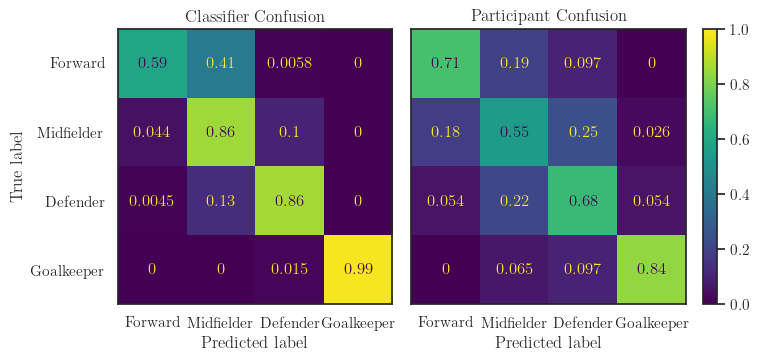

In [9]:
fig, (a1,a2) = plt.subplots(1,2,  layout='constrained')

ConfusionMatrixDisplay.from_predictions(np.repeat(y_test,10), clf.predict(np.repeat(X_test,10,axis=0)), labels=["Forward", "Midfielder", "Defender", "Goalkeeper"], normalize="true", ax=a1, colorbar=False, im_kw=dict(vmin=0, vmax=1))
a1.set_title("Classifier Confusion")

cm =np.array([[22,6,3,0],[28,85,38,4],[5,20,63,5],[0,2,3,26]])
cm = cm/cm.sum(axis=1)[:,None]
ConfusionMatrixDisplay(cm, display_labels=["Forward", "Midfielder", "Defender", "Goalkeeper"]).plot(ax=a2, im_kw=dict(vmin=0, vmax=1))
a2.yaxis.set_visible(False)

a2.set_title("Participant Confusion")
fig.savefig("Confustion Matrix.pdf", bbox_inches="tight")
